## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. 

As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [9]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

In [10]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [11]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")

/Users/jaime/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [12]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [13]:
# Convert the Close data type to a float

bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")

In [14]:
# Convert the Close data type to a float

bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [15]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [16]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [17]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [18]:
# Repeat Steps 1–4 for the coinbase DataFrame

coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [19]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()

In [20]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [37]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [38]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


In [23]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [45]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [25]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [26]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [27]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

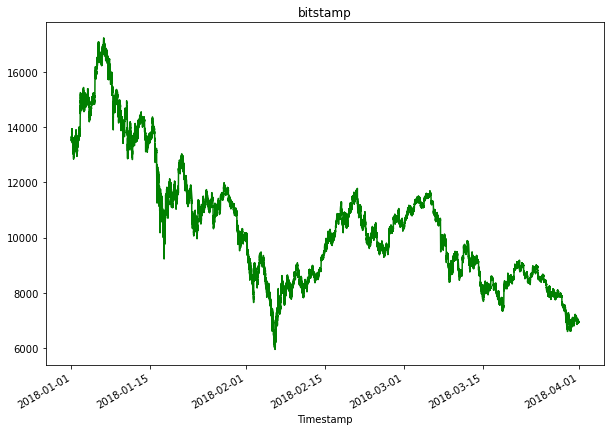

In [152]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot.line(figsize=(10,7), title= 'bitstamp', color='green');

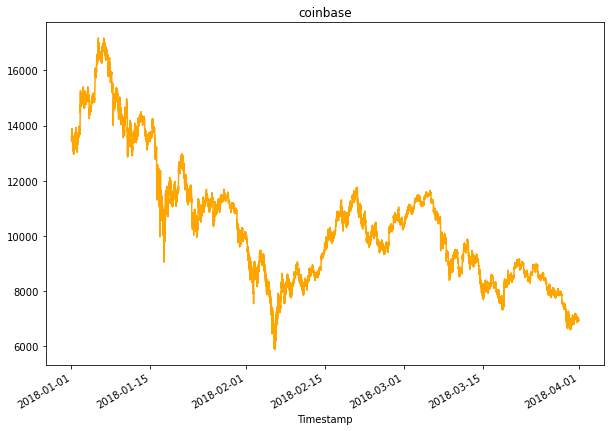

In [153]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot.line(figsize=(10,7), title= 'coinbase', color='orange');

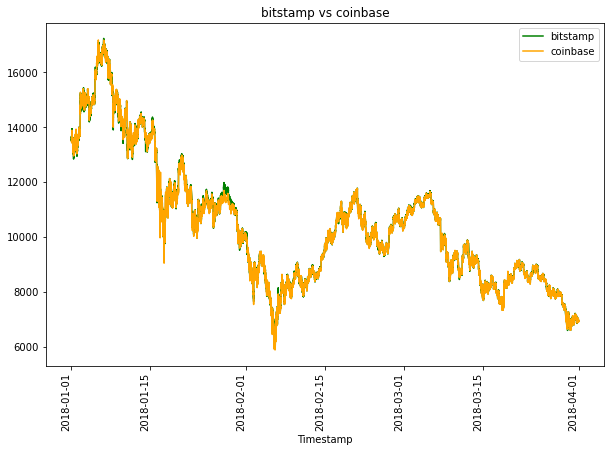

In [156]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot.line(legend=True,figsize=(10,7), title= 'bitstamp vs coinbase', color='green',rot=90,label='bitstamp');
coinbase_sliced.plot.line(legend=True,figsize=(10,7), color='orange',rot=90,label='coinbase');

<AxesSubplot:title={'center':'bitstamp v coinbase'}, xlabel='Timestamp'>

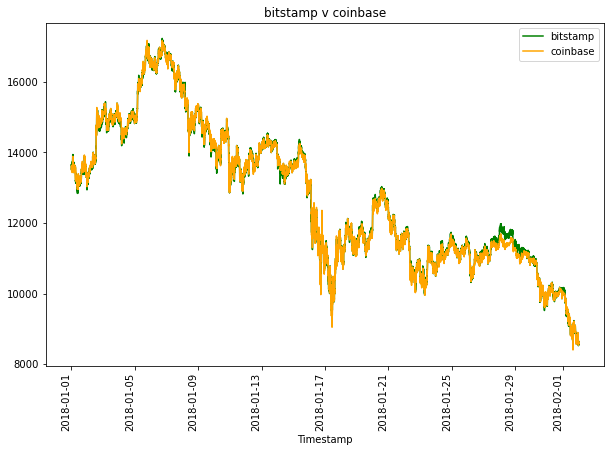

In [98]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase', color='green',rot=90, label='bitstamp')
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90, label='coinbase')

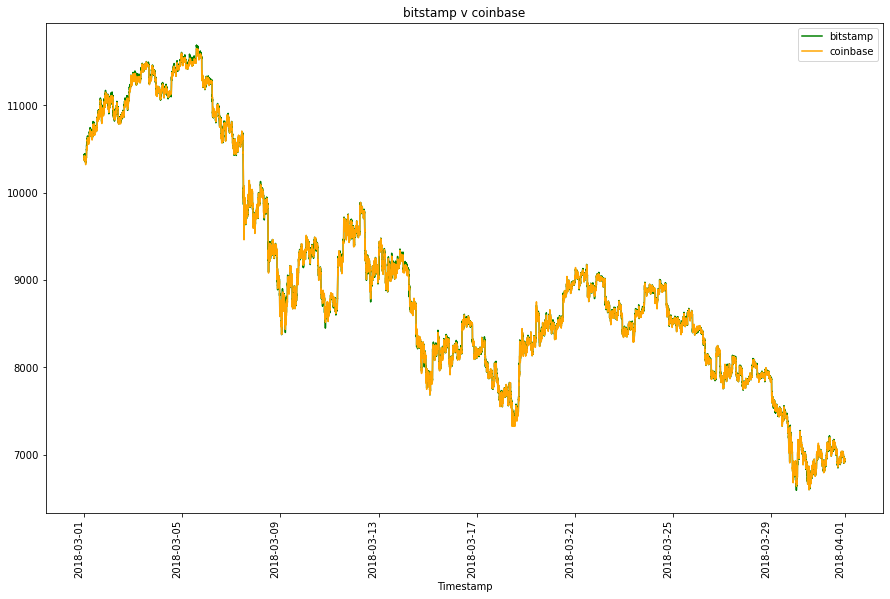

In [207]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot.line(legend=True, figsize=(15,10), title= 'bitstamp v coinbase', color='green',rot=90, label='bitstamp');
coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot.line(legend=True, figsize=(15,10), color='orange',rot=90, label='coinbase');

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visualizations, the degree of spread reduced in March relative to January.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

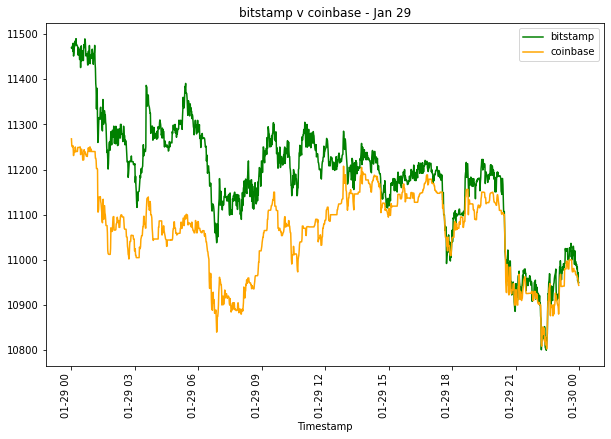

In [157]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-29'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Jan 29', color='green',rot=90,label='bitstamp');
coinbase_sliced.loc['2018-01-29'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase');

In [211]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early =  coinbase_sliced.loc['2018-01-29'] - bitstamp_sliced.loc['2018-01-29']


# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1430.000000
mean     -120.214510
std        85.164846
min      -300.270000
25%      -203.237500
50%      -132.420000
75%       -37.002500
max        48.010000
Name: Close, dtype: float64

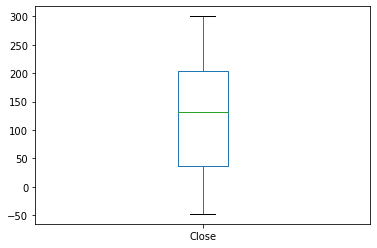

In [203]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box();

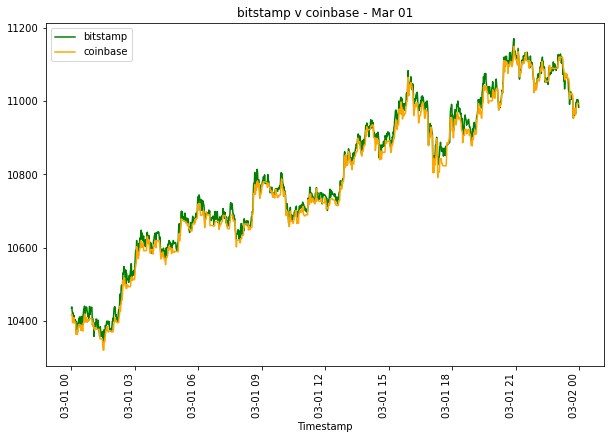

In [161]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-01'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Mar 01', color='green',rot=90,label='bitstamp')
coinbase_sliced.loc['2018-03-01'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase')

In [208]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle =coinbase_sliced.loc['2018-03-01'] - bitstamp_sliced.loc['2018-03-01']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1425.00000
mean      -14.45527
std        12.52715
min       -52.86000
25%       -22.87000
50%       -14.48000
75%        -6.12000
max        41.10000
Name: Close, dtype: float64

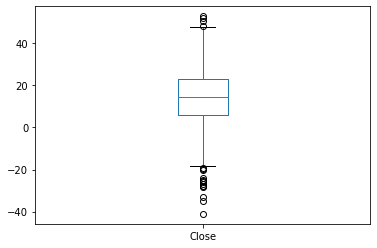

In [164]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box();

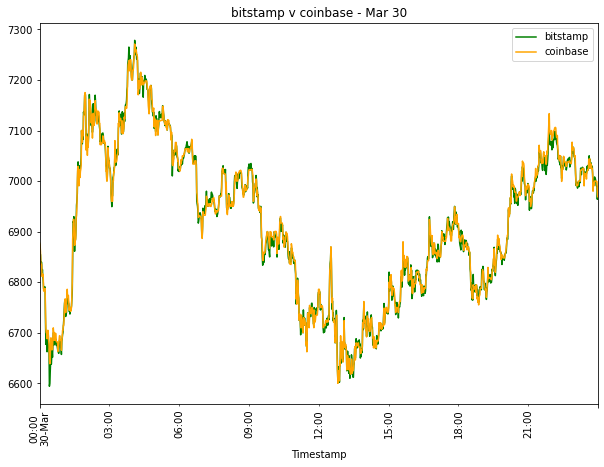

In [165]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-30'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Mar 30', color='green',rot=90,label='bitstamp');
coinbase_sliced.loc['2018-03-30'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase');

In [213]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-30']- bitstamp_sliced.loc['2018-03-30'] 

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
Name: Close, dtype: float64

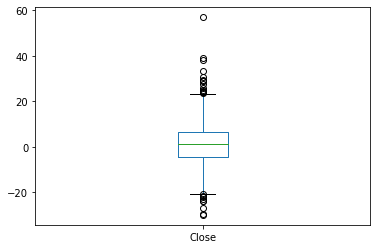

In [202]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box();

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [214]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

#JA comment: for the early and midle date, we have already made the calculation in Step 3 above
#            as the higher-priced was bitstamp and the lower was coinbased. However, we will do
#            this step for the late date as the exchanges inverted, so the higher-priced was 
#            coinbase and the lower-priced was bitstamp.
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-29'] - coinbase_sliced.loc['2018-01-29']
arbitrage_spread_middle = bitstamp_sliced.loc['2018-03-01'] - coinbase_sliced.loc['2018-03-01']
arbitrage_spread_late = coinbase_sliced.loc['2018-03-30'] - bitstamp_sliced.loc['2018-03-30']


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early>0]
positive_arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]
positive_arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late>0]

display(positive_arbitrage_spread_early.describe())
display(positive_arbitrage_spread_middle.describe())
display(positive_arbitrage_spread_late.describe())

count    1379.000000
mean      124.976425
std        82.959829
min         0.570000
25%        41.885000
50%       144.380000
75%       204.135000
max       300.270000
Name: Close, dtype: float64

count    1275.000000
mean       17.016031
std        10.288461
min         0.010000
25%         9.025000
50%        15.770000
75%        24.000000
max        52.860000
Name: Close, dtype: float64

count    797.000000
mean       7.538846
std        6.265063
min        0.010000
25%        2.780000
50%        6.060000
75%       10.570000
max       56.920000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [215]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).


spread_return_early= positive_arbitrage_spread_early / coinbase_sliced.loc['2018-01-29']
spread_return_middle= positive_arbitrage_spread_middle/ coinbase_sliced.loc['2018-03-01']
spread_return_late= positive_arbitrage_spread_late / coinbase_sliced.loc['2018-03-30']


# Review the spread return DataFrame
display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

# JA comments - Looking at the data below, we notice that the max values 
#               are below the 1% (0.01), which is the investment threshold
#               to cover all transactional related costs. 

count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

count    1.275000e+03
mean     1.582527e-03
std      9.580983e-04
min      9.017141e-07
25%      8.446468e-04
50%      1.455755e-03
75%      2.237845e-03
max      4.883813e-03
Name: Close, dtype: float64

count    797.000000
mean       0.001093
std        0.000911
min        0.000001
25%        0.000403
50%        0.000876
75%        0.001543
max        0.008558
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [216]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
display(profitable_trades_early.head(5))
display(profitable_trades_middle.head(5))
display(profitable_trades_late.head(5))

# JA comments- As mentioned above, there were no profitable trades in March 1 nor March 30.

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [196]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [197]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-29']
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-03-01']
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-30']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_middle.head())
display(profit_per_trade_late.head())

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [198]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

count    742.000000
mean     196.724070
std       34.604234
min      111.200000
25%      170.037500
50%      200.930000
75%      221.002500
max      300.270000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

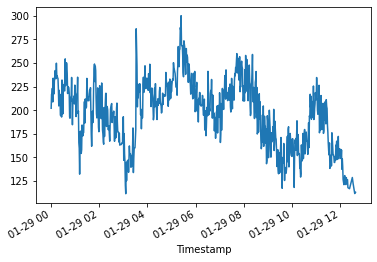

In [217]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot();



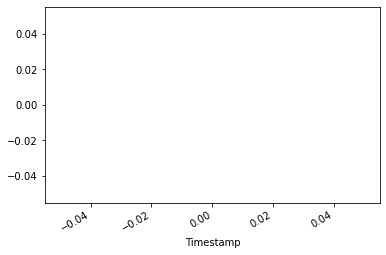

In [218]:
profit_per_trade_middle.plot();

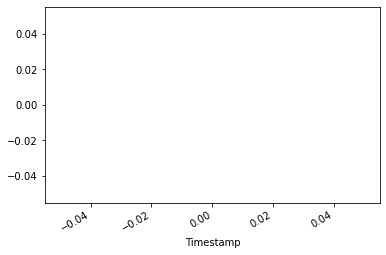

In [219]:
profit_per_trade_late.plot();

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [223]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early=profit_per_trade_early.sum()
profit_sum_middle=profit_per_trade_middle.sum()
profit_sum_late=profit_per_trade_late.sum()

print(f'the potential profit was {profit_sum_early} on January 29')
print(f'the potential profit was {profit_sum_middle} on March 01')
print(f'the potential profit was {profit_sum_late} on March 30')


the potential profit was 145969.25999999995 on January 29
the potential profit was 0.0 on March 01
the potential profit was 0.0 on March 30


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [231]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early =profit_per_trade_early.cumsum()
cumulative_profit_middle =profit_per_trade_middle.cumsum()
cumulative_profit_late =profit_per_trade_late.cumsum()
cumulative_profit_early

Timestamp
2018-01-29 00:00:00       201.98
2018-01-29 00:01:00       418.98
2018-01-29 00:02:00       636.20
2018-01-29 00:03:00       859.42
2018-01-29 00:04:00      1068.06
                         ...    
2018-01-29 12:24:00    145494.72
2018-01-29 12:31:00    145623.16
2018-01-29 12:33:00    145745.09
2018-01-29 12:37:00    145856.51
2018-01-29 12:39:00    145969.26
Name: Close, Length: 742, dtype: float64

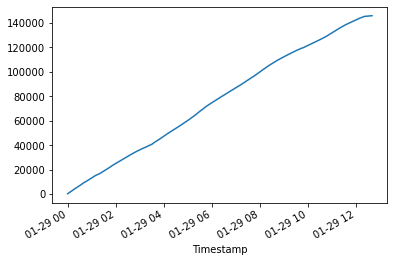

In [201]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot();
cumulative_profit_middle.plot();
cumulative_profit_late.plot();

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** early on the data set, there seems to be an increasing arbitrage opportunity, however, already by Mar 1, the opportunity had disappeared, which is confirmed by the data from Mar 30. There is only one line because for both the middle and late data sets, there were no instances where the return were over the required 1% to cover at least the transactional costs. 

# Analysis Report



The purpose of this application is to analyse the potential arbitrage opportunities in cryptocurrencies arising from simultaneous price dislocations in different markets using historical data from Jan 01, 2018 to Mar 31, 2018. 

## Analysis

Looking at the closing prices in both markets over the given period, we can see below that there seem to be more opportunities earlier in the period. 

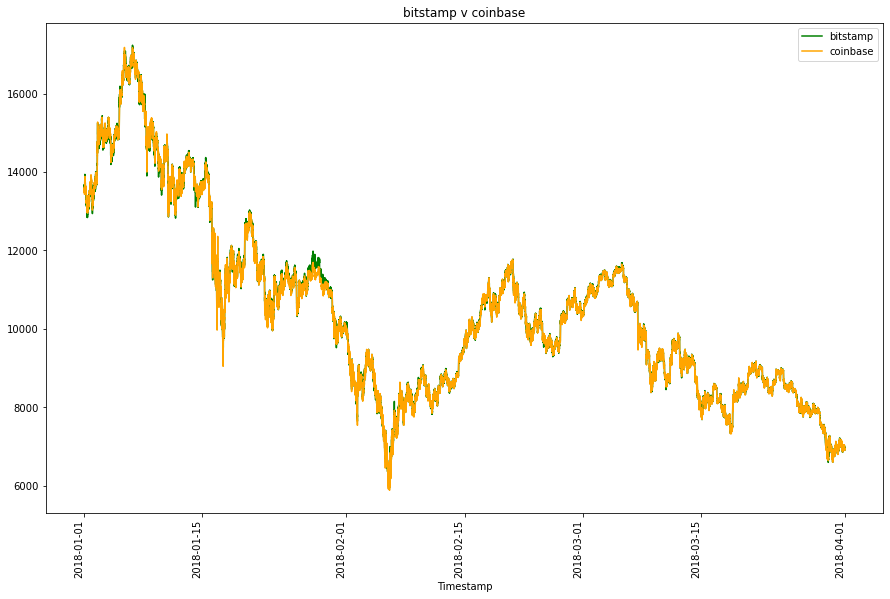

In [225]:
bitstamp_sliced.loc['2018-01-01':'2018-04-01'].plot.line(legend=True, figsize=(15,10), title= 'bitstamp v coinbase', color='green',rot=90, label='bitstamp');
coinbase_sliced.loc['2018-01-01':'2018-04-01'].plot.line(legend=True, figsize=(15,10), color='orange',rot=90, label='coinbase');

The degree of spread reduced in March relative to January, which was confirmed by analysis three dates during the period (Jan 29, Mar 01 and Mar 30). As seen below, the visualisations confirm that the degree of spread reduces and there were less opportunities for arbitrage.

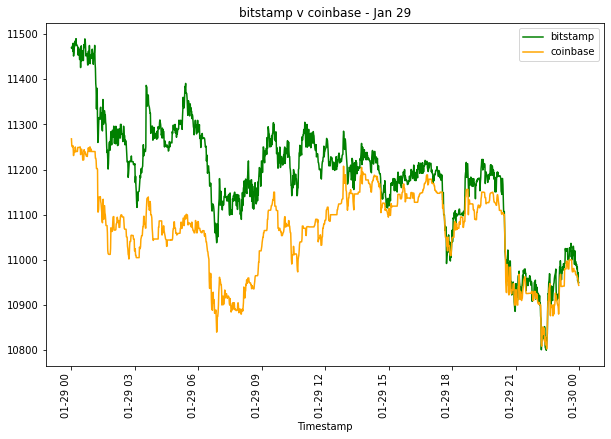

In [226]:
bitstamp_sliced.loc['2018-01-29'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Jan 29', color='green',rot=90,label='bitstamp');
coinbase_sliced.loc['2018-01-29'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase');

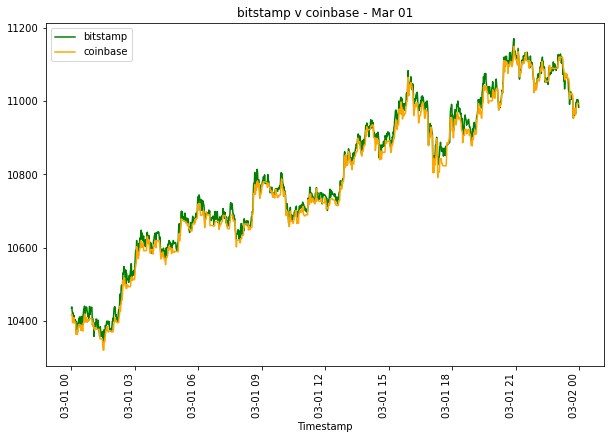

In [228]:
bitstamp_sliced.loc['2018-03-01'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Mar 01', color='green',rot=90,label='bitstamp')
coinbase_sliced.loc['2018-03-01'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase');

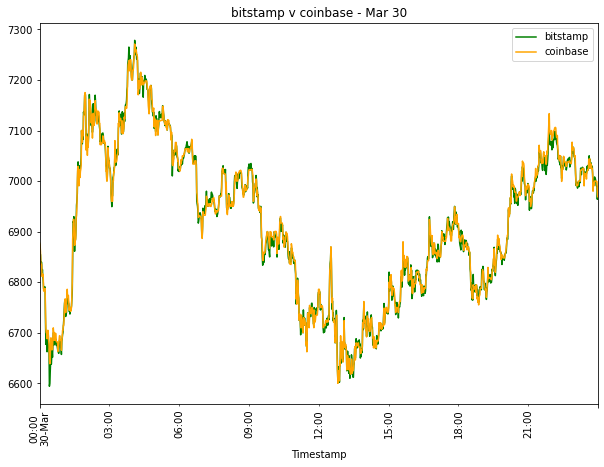

In [229]:
bitstamp_sliced.loc['2018-03-30'].plot.line(legend=True, figsize=(10,7), title= 'bitstamp v coinbase - Mar 30', color='green',rot=90,label='bitstamp');
coinbase_sliced.loc['2018-03-30'].plot.line(legend=True, figsize=(10,7), color='orange',rot=90,label='coinbase');

Looking at the statistical data for the spread returns on the three dates, we notice that the max values are below the 1% (0.01), which is the investment threshold to cover all transactional related costs. 

In [230]:
display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

count    1.275000e+03
mean     1.582527e-03
std      9.580983e-04
min      9.017141e-07
25%      8.446468e-04
50%      1.455755e-03
75%      2.237845e-03
max      4.883813e-03
Name: Close, dtype: float64

count    797.000000
mean       0.001093
std        0.000911
min        0.000001
25%        0.000403
50%        0.000876
75%        0.001543
max        0.008558
Name: Close, dtype: float64

## Conclusion

Early on the data set, there seems to be an increasing arbitrage opportunity, however, already by Mar 1, the opportunity for profitable arbitrage had disappeared, which is confirmed by the data from Mar 30. There were no instances where the return were over the required 1% to cover at least the transactional costs. 